Notebook created by Jennifer McDaniel 2023-08-01

In [1]:
#Work performed on JMcDaniel Mac
pwd

/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


# HG002 chrXY Draft Benchmark Exclusions
chrXY draft benchmark was generated from the T2T HG002 complete assembly of chromosomes X and Y by J.Wagner and J.Zook.  This benchmark includes more challenging regions, like segmental duplications, that were excluded 
from previous GIAB benchmarks. Following curation of the draft it was determined that some regions needed to be excluded from the final version of the benchmark. 

# vcf and bed draft benchmarks 
draft-benchmark bed retrieved from defrabb run ['20230315_v0.011-HG002XY'](https://drive.google.com/drive/folders/1iNuMIwNlW4pex5bn5OllaURZBxI3FNsB)  

draft-benchmark vcf retreived from [defrabb dipcall output](https://drive.google.com/drive/folders/1bQj-eYw1hrUo7ZaI1aRfCVIvpD6jgO1g) 

## Description of regions that will be excluded

### 1. Excluding benchmark_correct = "no" (error) and "unsure" manually curated variants
##### exclusion coordinates: see file created from curation table tsv
Exclude variants found during manual curation by collaborators and NIST, where the benchmark appears to be incorrect (no) or where NIST curators were unsure if the variant is correct.

### 2. Inversion error
##### exclusion coordinates: entire region chrY:17455804-18450201
Sites received from J.Zook 7/21/23 (slack message)

A region on ~ chrY:17590000-18320000 has a cluster of putative FPs and FNs looks like it is related to a known inversion error in the T2T-Y HG002 assembly, which is corrected in the whole genome T2T-HG002. As the T2T-HG002 project progresses, we will track that region and consider how to improve an HG002 XY benchmark. As a note, it is interesting that ONT seems to support some variants in T2T-Y vs GRCh38, but it's probably related to challenges in mapping to these highly identical large segdups surrounding the small unique inverted sequence called P5 in the chrY paper. Reads aligned to the whole genome T2T-HG002 seem to support it as correct unlike T2T-Y.

The pair of segdups affected is chrY:17,954,718-18,450,201 and chrY:17455804-17951260, and since these almost overlap we should exclude the entire region chrY:17455804-18450201.

### 3. Segdup differences between the assembly-based alignments and mapping-based alignments that involves TSPY2 gene
##### exclusion coordinates: chrY:6234812-6532742 and chrY:9,628,425-9,919,592
Sites received from J.Zook 7/21/23 (slack message)

For the TSPY2 segdup pair, which is actually multiple segdups, we can exclude the segdup pairs in these regions: chrY:6234812-6532742 and chrY:9,628,425-9,919,592

it looks like it's somewhere inside the segdup pair chrY:6362052-6532742 and chrY:9,628,425-9,802,672 that mapping based calls start almost completely matching the assembly-based calls, so probably don't need to exclude more than this. It looks similar in both copies of the segdup, and the left side of the 9M segdup is near the start of the TSPY array, though still end up including ~40kb between ~9.58-9.62M. Looking at other genes in the region we're excluding, TTTY22 also moves, with a 10kb del at 9.81M and 10kb ins at 6.36M. RBMY2NP and RMBY2GP and some other TTTY paralogs also swap positions. Interestingly, all of these genes are annotated differently on T2TY by CAT+liftoff and Refseq, where refseq seems to match gene sequences, whereas CAT+liftoff tries to match positions even if the gene sequences differ

message sent to curators: particular pair of segdups separated by 4Mbp on chrY (chrY:9,812,675-9,914,616 and chrY:6,260,340-6,362,053, which includes the TSPY2 gene) that was different between the assembly-based alignments and mapping-based alignments. We presented some slides to the T2T HG002 Q100 group about this region, as an example where the assembly seems correct but it could be aligned to GRCh38 in very different ways - https://docs.google.com/presentation/d/1NAwwM7_v633vEAxNjBH_IYDfqTwDJjRs2DDaDaZcCCY/edit?usp=sharing. 

-----------------

## 1. Prepare .bed files of regions to exclude

#### Get manual curation "no" and "unsure"
Using the [Manuscript Figure Curation Sheet](https://docs.google.com/spreadsheets/d/19n8NAGFH317824cFhshShiv5-ooK-4qqmSF_CzDpO6g/edit#gid=0) regions were pulled where the `GIAB_Correct_In_Benchmark` field was either "no" or "unsure".  Resulting file: `chrXY_manual_curation_no-unsure_only.bed`

In [7]:
date
#no-unsure_chrXY-benchmark_exclusion.bed (#1)

#sort
sed 's/^chr//' ../../data/exclusions/intermediate/chrXY_manual_curation_no-unsure_only.bed | grep "^[XY]" | sed 's/^X/23/;s/^Y/24/' | sort -k1,1n -k2,2n -k3,3n | sed 's/^23/X/;s/^24/Y/;s/^/chr/'> ../../data/exclusions/intermediate/chrXY_manual_curation_no-unsure_only_sorted.bed

#merge regions within 100 bp of one another
mergebed -i ../../data/exclusions/intermediate/chrXY_manual_curation_no-unsure_only_sorted.bed -d 100 > ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion.bed

#how many no's and unsures?
wc -l ../../data/exclusions/intermediate/chrXY_manual_curation_no-unsure_only.bed
wc -l ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion.bed

Fri Sep 22 13:18:00 EDT 2023
     107 ../../data/exclusions/intermediate/chrXY_manual_curation_no-unsure_only.bed
      95 ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion.bed


In [3]:
date
pwd

# genomic coordinates for inversion (#2)
coordinate1="chrY\t17455804\t18450201"

# Create.bed file
echo -e "$coordinate1" > ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion.bed
echo -e "$coordinate2" >> ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion.bed

Tue Aug  1 13:13:59 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


In [4]:
date
pwd

# genomic coordinates for segdups involving TSPY2 gene (#3)
coordinate1="chrY\t6234812\t6532742"
coordinate2="chrY\t9628425\t9919592"

# Create .bed file
echo -e "$coordinate1" > ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion.bed
echo -e "$coordinate2" >> ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion.bed

Tue Aug  1 13:14:05 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


## 2.  Get resource files

### v3.1 GIAB stratification AllTandemRepeatsandHomopolymers
This file is the union of the Low Complexity (repeat) stratifications below and will be used for expanding regions to exclude prior to exclusion step. 

`GRCh3X_AllTandemRepeats_*_slop5.bed.gz`  
union of SimpleRepeat dinucleotide, trinucleotide, and quadnucleotide STRs as well as UCSC Genome Brower RepeatMasker_LowComplexity, RepeatMasker_SimpleRepeats, RepeatMasker_Satellite, and TRF_SimpleRepeat

`GRCh3X_AllHomopolymers_gt6bp_imperfectgt10bp_slop5.bed.gz`  
union of all perfect homopolymers >6bp and imperfect homopolymers >10bp

### GRCh38 file with chromosome lengths
[human.b38.genome](https://drive.google.com/file/d/1vtufmAUBzAgGgCF4DfparuozFAgo4Flr/view) was previously created and copied from team resources Google Drive. This file contains the chromosome sizes for GRCh38 reference and is needed for adding slop. The code below for generating this .genome file is provided for reference
```
#index reference
samtools faidx GCA_000001405.15_GRCh38_no_alt_analysis_set.fna.fai > GRCh38.fa.fai

#prepare .genome files with chromosome lengths
cat GRCh38.fa.fai | cut -f 1,2 | grep -Ev '^[chr0-9XYM]_|^[chr0-9][0-9XYM]_|^chrUn_' > human.b38.genome
```

### Bedtools
use bedtools conda environment

In [1]:
bedtools --version

bedtools v2.31.0


## 3. Expand exclusion regions 
Expand bed coordinates for regions you want to exclude to completely cover any overlapping homopolymers and tandem repeats. Multi-intersect followed by merge is essentially taking the union of bed files.  Perform expansion for each region type to be removed from your draft benchmark.  

Links to information on relevant bedtools commands needed for expansion  
[intersectBed -wa](https://bedtools.readthedocs.io/en/latest/content/tools/intersect.html)  
[multiIntersectBed](https://bedtools.readthedocs.io/en/latest/content/tools/multiinter.html)   
[mergeBed](https://bedtools.readthedocs.io/en/latest/content/tools/merge.html)  

In [10]:
date
pwd

intersectBed -wa -a ../../resources/GRCh38_AllTandemRepeatsandHomopolymers_slop5.bed.gz -b ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion.bed | multiIntersectBed -i stdin ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion.bed | mergeBed -i stdin > ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion_repeatexpanded.bed

Fri Sep 22 13:21:20 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


In [11]:
date
pwd
intersectBed -wa -a ../../resources/GRCh38_AllTandemRepeatsandHomopolymers_slop5.bed.gz -b ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion.bed | multiIntersectBed -i stdin ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion.bed | mergeBed -i stdin > ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion_repeatexpanded.bed

Fri Sep 22 13:22:25 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


In [12]:
date
pwd
intersectBed -wa -a ../../resources/GRCh38_AllTandemRepeatsandHomopolymers_slop5.bed.gz -b ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion.bed | multiIntersectBed -i stdin ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion.bed | mergeBed -i stdin > ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion_repeatexpanded.bed

Fri Sep 22 13:23:21 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


## 4. Add slop to expanded exclusion bed
Adds padding to both sides of the regions you wish to exclude.  `-b` set to add 50bp of slop on either side of region.

Link to information on relevant bedtools commands needed for adding slop  
[slopBed](https://bedtools.readthedocs.io/en/latest/content/tools/slop.html) 

In [15]:
date
pwd
slopBed -i ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion_repeatexpanded.bed -b 50 -g ../../resources/human.b38.genome > ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed

Fri Sep 22 13:26:37 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


In [16]:
date
pwd
slopBed -i ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion_repeatexpanded.bed -b 50 -g ../../resources/human.b38.genome > ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed

Fri Sep 22 13:27:35 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


In [19]:
date
pwd
slopBed -i ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion_repeatexpanded.bed -b 50 -g ../../resources/human.b38.genome > ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed

Fri Sep 22 13:28:58 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


## 5. Exclude expanded regions
Exclude expanded regions of interest w/ slop from draft benchmark.

Link to information on relevant bedtools commands needed for exclusion  
[subtractBed](https://bedtools.readthedocs.io/en/latest/content/tools/subtract.html)

In [23]:
date
pwd
subtractBed -a ../../data/draft_benchmarks/GRCh38_T2T-XY-v2.7_dipcall-z2k.benchmark.bed -b ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed | subtractBed -a stdin -b ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed | subtractBed -a stdin -b ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed > ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.bed


Fri Sep 22 14:05:59 EDT 2023
/Users/jmcdani/Documents/XY_benchmark/giab-chrXY-benchmark/scripts/chrXY_benchmark_exclusions


## 6. QC candidate benchmark regions

In [31]:
echo "sum of exclusions"
awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../../data/exclusions/intermediate/no-unsure_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed
awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../../data/exclusions/intermediate/TSPY2segdups_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed
awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../../data/exclusions/intermediate/inversion_chrXY-benchmark_exclusion_repeatexpanded_slop50.bed

echo "sum of regions in draft Benchmark"
awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../../data/draft_benchmarks/GRCh38_T2T-XY-v2.7_dipcall-z2k.benchmark.bed

echo "sum of regions in draft benchmark following exclusions, final benchmark"
awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.bed

sum of exclusions
26985
594426
994497
sum of regions in draft Benchmark
163075893
sum of regions in draft benchmark following exclusions, final benchmark
161549546


Justin Wagner also performed [comparisons with hap.py](https://drive.google.com/drive/folders/1h7YnVXXDnJc9HUCT-BQm_quBfFvkzfGo?usp=share_link).  We expected to see slight improvements to precision and recall between the draft and candidate (v1.0) versions of the benchmark. F1 scores are shown below:
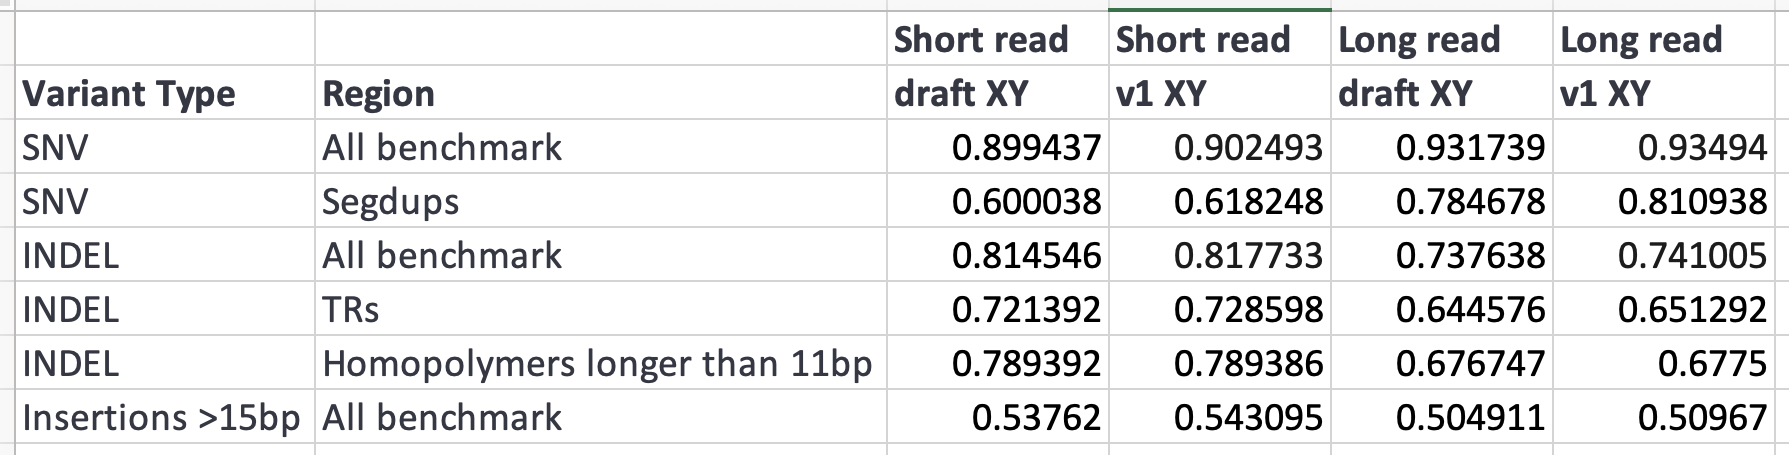

## 7. Correct vcf genotypes
convert haploid GT's (non-PAR regions) to "1", instead of the 1/1 that defrabb currently does

In [1]:
bgzip --version

bgzip (htslib) 1.7
Copyright (C) 2018 Genome Research Ltd.


In [2]:
gunzip -c ../../data/draft_benchmarks/GRCh38_T2T-XY-v2.7_dipcall-z2k.dip.vcf.gz | sed 's/\.|1:0,1/1:1/;s/1|\.:0,1/1:1/' | bgzip -c > ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.vcf.gz

In [5]:
#index vcf
tabix -p vcf ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.vcf.gz

#### candidate benchmark md5s

In [6]:
md5 ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.vcf.gz
md5 ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.vcf.gz.tbi
md5 ../../data/HG002_GRCh38_chrXY_smallvar_v1.0.bed

MD5 (../../data/HG002_GRCh38_chrXY_smallvar_v1.0.vcf.gz) = 2b4d07d65b2f160eaf891aeb810d5ffa
MD5 (../../data/HG002_GRCh38_chrXY_smallvar_v1.0.vcf.gz.tbi) = 4348be20b0ec00a6c093ec9488508bc8
MD5 (../../data/HG002_GRCh38_chrXY_smallvar_v1.0.bed) = 96e20f3a7c74ff71c2d96c1fe9c91d5f


candidate benchmarks and this .ipynb transferred to [google drive](https://drive.google.com/drive/folders/1RiBEHcnR7ZxJ2eJIRX1Yl6IHfUj5u5iQ) 9/25/23 for evaluation.